In [5]:
# conda install nltk #at command prompt or here in jupyter
#import nltk  # import nltk
#nltk.download() # to downlaod the necessary stuffs needed
import nltk

In [7]:
#read the file in the smszip folder
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [8]:
print(len(messages))

5574


In [13]:
#lets check messages in the folder
for num, message in enumerate(messages[:10]):
    print(num, message)
    print('\n')

(0, 'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')


(1, 'ham\tOk lar... Joking wif u oni...')


(2, "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")


(3, 'ham\tU dun say so early hor... U c already then say...')


(4, "ham\tNah I don't think he goes to usf, he lives around here though")


(5, "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, \xc2\xa31.50 to rcv")


(6, 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.')


(7, "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune")


(8, 'spam\tWINNER!! As a valued network customer you have been selected to receive

In [15]:
#lets read the spam file into a pandas dataframe
import pandas as pd
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['labels','message']) # pass names to label the colums

In [16]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#lets check some statistics about our data
messages.describe()


,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
labels     5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [19]:
#lets groupby our label and check some statistics
messages.groupby('labels').describe()

message
labels                                                          
ham    count                                                4825
       unique                                               4516
       top                                Sorry, I'll call later
       freq                                                   30
spam   count                                                 747
       unique                                                653
       top     Please call our customer service representativ...
       freq                                                    4

In [20]:
#lets get the length of each message
messages['length'] = messages['message'].apply(len)

In [21]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
#lets visualize our data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#%matplotlib qt

In [47]:
#check statistics to choose bin size for histogram
messages['length'].describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

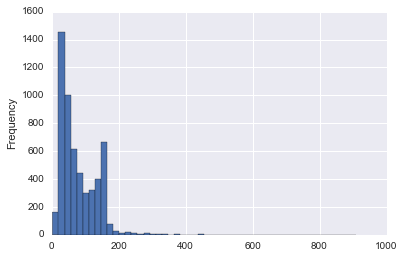

In [48]:
messages['length'].plot(bins=50, kind='hist')

In [57]:
#ets get the messasge with the longest text and the text itself
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001306E550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013522748>], dtype=object)

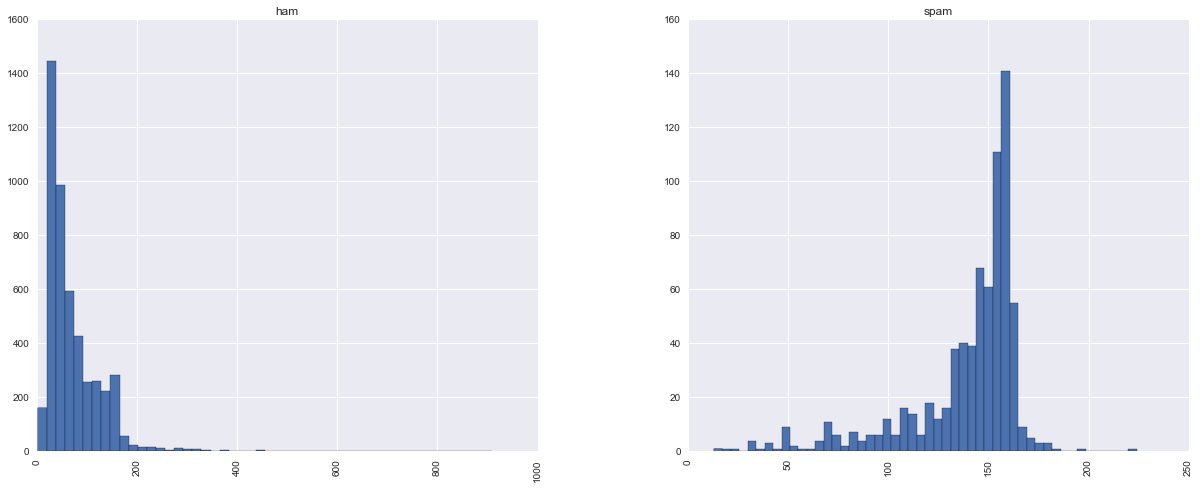

In [63]:
#lets plot our histograms by labels
messages.hist(column='length', by='labels', bins=50, figsize=(20,8))

In [64]:
#our goal is to process all the text in the message column of our dataframe to some form of numerical vector so we can build our 
#model
import string

In [65]:
#less try to get rid of some symbols in the texts in the messages, by first trying our hands on some small text
mess = 'Sample message! Notice: It containes punctuation.'

#lets check the list of punctuations found in string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
nopunc = [char for char in mess if char not in string.punctuation]
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'I',
 't',
 ' ',
 'c',
 'o',
 'n',
 't',
 'a',
 'i',
 'n',
 'e',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [68]:
#now lets join characters without the punctuations back into who words 
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice It containes punctuation'

In [72]:
#now lets remove stop words
from nltk.corpus import stopwords

#lets check some stopwords
stopwords.words('english')[0:10]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your']

In [73]:
#now lets split the words in our nopunc message into a list
nopunc = nopunc.split()
nopunc

['Sample', 'message', 'Notice', 'It', 'containes', 'punctuation']

In [76]:
#now lets remove all stop words from this list
clean_mess = [word for word in nopunc if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'containes', 'punctuation']

In [92]:
#lets put the above cleaning steps into a function
def text_process(mess):
    #check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    #now lets join characters without the punctuations back into who words 
    nopunc = ''.join(nopunc)
    #now remove all stop words from this list
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    

In [93]:
#lest check our real live messages.
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [94]:
#lest tokenize our message, that is convert our normal text strings into a list of tokens which are the words we want
#lets check a quick example
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [95]:
#lets vectorize our text 
from sklearn.feature_extraction.text import CountVectorizer

In [96]:
#lets call the ContVectorizer constructor and pass our function to it
bow_transformer = CountVectorizer(analyzer=text_process)

In [97]:
#fit the model to the messages 
bow_transformer.fit(messages['message'])

C:\Users\adaba\Anaconda3\envs\gl-env\lib\site-packages\ipykernel\__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


CountVectorizer(analyzer=<function text_process at 0x00000000135EEF98>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None,
        vocabulary=None)

In [98]:
#lets see some sample message
message4  = messages['message'][3]
message4

'U dun say so early hor... U c already then say...'

In [99]:
#lets check how message4 has been transformed
bag_of_words_4 = bow_transformer.transform([message4])
print(bag_of_words_4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


#from the results above, the numbers in the paranthesis to the side of the zeros are the words. and the numbers outside the 
#paranthesis are their respective counts. this means there are 9 uniques words in the message 4 and the word coded '2' appears 10 times

In [111]:
#we can see the actual words using their codes from the transformer
print(bow_transformer.get_feature_names()[9554])
print(bow_transformer.get_feature_names()[4068])

say
U


In [114]:
#now we can see it works so lets apply it on our data messages in our dataframe
messages_bow = bow_transformer.transform(messages['message'])

C:\Users\adaba\Anaconda3\envs\gl-env\lib\site-packages\ipykernel\__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [118]:
#lets check some features
print('Shape of sparse matrix: ', messages_bow.shape)
print('Amount of non-zero occurences: ', messages_bow.nnz )
print('Sparsity : %.2f%%' % (100.0* messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

('Shape of sparse matrix: ', (5572, 11425))
('Amount of non-zero occurences: ', 50548)
Sparsity : 0.08%


In [119]:
%config IPCompleter.greedy=True


In [120]:
#fit TfidfTransformer to our messages
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [122]:
#lets transform a single message and see
tfidf4 = tfidf_transformer.transform(bag_of_words_4)
print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [123]:
#lets the inverse document frequency number of some words 
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

3.28005242674


In [124]:
#lets transform the entire messages
messages_tfidf =  tfidf_transformer.transform(messages_bow)

print(messages_tfidf.shape)

(5572, 11425)


In [128]:
#now we are going to train our model
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['labels'])

In [132]:
#lets check the accuracy of the prediction on a single messasge
print('Predicted :', spam_detect_model.predict(tfidf4)[0])
print('Expected : ', messages['labels'][3])

('Predicted :', 'ham')
('Expected : ', 'ham')


In [133]:
#lets see how our model will perform
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


In [136]:
#lets evaluate our model using precision and recall
from sklearn.metrics import classification_report
print(classification_report(messages['labels'], all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [138]:
#in the above model training we used the same trained data for a our validation. 
# that is not a good practice so lets split our data into training and test sets
from sklearn.cross_validation import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['labels'], test_size=0.2)

In [139]:
#lets check the size of the training and test data sets
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

(4457, 1115, 5572)


In [141]:
#lets set all our models and preprocessing in single pipeline
from sklearn.pipeline import Pipeline


In [142]:
#lets fit our steps in a pipeline
pipeline = Pipeline([('bow', CountVectorizer(analyzer=text_process)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier', MultinomialNB())])

In [143]:
#lets fit our model
pipeline.fit(msg_train, label_train)

C:\Users\adaba\Anaconda3\envs\gl-env\lib\site-packages\ipykernel\__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000000135EEF98>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproces...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [144]:
#now lets make the prediction our test data
predictions = pipeline.predict(msg_test)

C:\Users\adaba\Anaconda3\envs\gl-env\lib\site-packages\ipykernel\__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [145]:
print(classification_report(predictions, label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1015
       spam       0.74      1.00      0.85       100

avg / total       0.98      0.97      0.97      1115



From the predicitons we had 98% precision and 97% recall and the f1-score is 97%. We seek to improve it more. :)